In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [65]:
heartdata = pd.read_csv('heart_kaggle_project.csv')
#leaving out some data checks and descriptive statistics because contained in data transformation and scouting NB

In [66]:
heartdata = heartdata.reindex(np.random.permutation(heartdata.index))

In [67]:
heartdata = heartdata.reset_index(drop=True)
heartdata.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,53,1,2,130,197,1,0,152,0,1.2,0,0,2,1
1,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
2,52,1,0,112,230,0,1,160,0,0.0,2,1,2,0
3,57,1,0,165,289,1,0,124,0,1.0,1,3,3,0
4,50,1,2,129,196,0,1,163,0,0.0,2,0,2,1


In [68]:
#scaling continuous variables, I am including restecg, slope, and ca because I think of
#these as directional values, not categorical

In [69]:
heartdata[['age', 'trestbps', 'chol', 'restecg', 'thalach', 'oldpeak', 'slope', 'ca']] = StandardScaler().fit_transform(heartdata[['age', 'trestbps', 'chol','restecg', 'thalach', 'oldpeak', 'slope', 'ca']])
heartdata.head()

C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.150692,1,2,-0.092738,-0.952051,1,-1.005832,0.102904,0,0.138373,-2.274579,-0.714429,2,1
1,-0.702136,0,2,-0.092738,0.555337,0,0.898962,-0.465593,0,-0.724323,0.976352,-0.714429,2,1
2,-0.260980,1,0,-1.120770,-0.314310,0,0.898962,0.452748,0,-0.896862,0.976352,0.265082,2,0
3,0.290464,1,0,1.906214,0.825893,1,-1.005832,-1.121550,0,-0.034166,-0.649113,2.224104,3,0
4,-0.481558,1,2,-0.149851,-0.971377,0,0.898962,0.583939,0,-0.896862,0.976352,-0.714429,2,1


In [70]:
#drop categorical values
x = heartdata.drop(['sex', 'cp', 'fbs', 'exang', 'thal', 'target'], axis = 1)
x.head()

,age,trestbps,chol,restecg,thalach,oldpeak,slope,ca
0,-0.150692,-0.092738,-0.952051,-1.005832,0.102904,0.138373,-2.274579,-0.714429
1,-0.702136,-0.092738,0.555337,0.898962,-0.465593,-0.724323,0.976352,-0.714429
2,-0.260980,-1.120770,-0.314310,0.898962,0.452748,-0.896862,0.976352,0.265082
3,0.290464,1.906214,0.825893,-1.005832,-1.121550,-0.034166,-0.649113,2.224104
4,-0.481558,-0.149851,-0.971377,0.898962,0.583939,-0.896862,0.976352,-0.714429


In [71]:
y = heartdata['target']
y.head()

0    1
1    1
2    0
3    0
4    1
Name: target, dtype: int64

In [72]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

In [73]:
pca.explained_variance_ratio_

array([0.29109979, 0.16025912])

In [74]:
print((pca.explained_variance_ratio_).sum())

0.4513589110270839


In [75]:
finalDf = pd.concat([principalDf, heartdata[['target']]], axis = 1)
finalDf.head()

,PC1,PC2,target
0,0.740496,-1.263696,1
1,-1.164145,0.111370,1
2,-1.573017,-0.196660,0
3,2.344285,1.456616,0
4,-1.860856,-0.416328,1


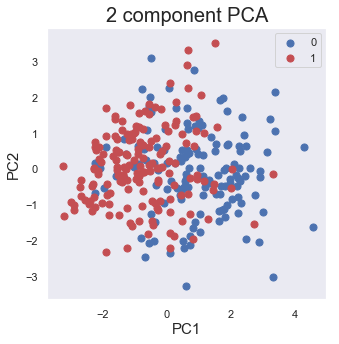

In [76]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['b', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [77]:
#not very satisfying - and it's known correlation between target and some categorical data is "good"
#so adding in sex, cp, exang, thal 

In [78]:
x_d = pd.get_dummies(heartdata, columns=['sex', 'cp', 'exang', 'thal'])
x_d = x_d.drop('target', axis = 1)
x_d.head()

,age,trestbps,chol,fbs,restecg,thalach,oldpeak,slope,ca,sex_0,...,cp_0,cp_1,cp_2,cp_3,exang_0,exang_1,thal_0,thal_1,thal_2,thal_3
0,-0.150692,-0.092738,-0.952051,1,-1.005832,0.102904,0.138373,-2.274579,-0.714429,0,...,0,0,1,0,1,0,0,0,1,0
1,-0.702136,-0.092738,0.555337,0,0.898962,-0.465593,-0.724323,0.976352,-0.714429,1,...,0,0,1,0,1,0,0,0,1,0
2,-0.260980,-1.120770,-0.314310,0,0.898962,0.452748,-0.896862,0.976352,0.265082,0,...,1,0,0,0,1,0,0,0,1,0
3,0.290464,1.906214,0.825893,1,-1.005832,-1.121550,-0.034166,-0.649113,2.224104,0,...,1,0,0,0,1,0,0,0,0,1
4,-0.481558,-0.149851,-0.971377,0,0.898962,0.583939,-0.896862,0.976352,-0.714429,0,...,0,0,1,0,1,0,0,0,1,0


In [79]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_d)
principalDf2 = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

In [80]:
pca.explained_variance_ratio_

array([0.24981568, 0.12983318])

In [81]:
print((pca.explained_variance_ratio_).sum())

0.37964886375372


In [82]:
finalDf2 = pd.concat([principalDf2, heartdata[['target']]], axis = 1)
finalDf2.head()

,PC1,PC2,target
0,0.454255,-1.017266,1
1,-1.442294,0.310396,1
2,-1.556092,-0.374009,0
3,2.400269,1.455412,0
4,-2.046444,-0.489911,1


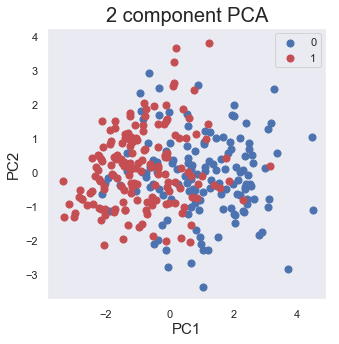

In [83]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['b', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf2['target'] == target
    ax.scatter(finalDf2.loc[indicesToKeep, 'PC1']
               , finalDf2.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [84]:
#Completely the same - the top 2 pricipal components are in the true numerical 
#data (age,trestbps,chol,restecg,thalach,oldpeak,slope, ca).
#However, added variables cause PC1, PC2  to contribute less to the overall variance 

In [85]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x_d)
principalDf3 = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3'])

In [86]:
pca.explained_variance_ratio_

array([0.24981568, 0.12983318, 0.09876902])

In [87]:
print((pca.explained_variance_ratio_).sum())

0.4784178818976403


In [88]:
# even with 3 components, less than 50% of variance explained, will run models anyway...

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
classifiers = []
RFmodel = RandomForestClassifier()
classifiers.append(RFmodel)
SVMmodel = svm.SVC()
classifiers.append(SVMmodel)
DTmodel = DecisionTreeClassifier()
classifiers.append(DTmodel)
KNmodel = KNeighborsClassifier(n_neighbors=3)
classifiers.append(KNmodel)
LRmodel = LogisticRegression()
classifiers.append(LRmodel)
GBmodel = GradientBoostingClassifier()
classifiers.append(GBmodel)
ABmodel = AdaBoostClassifier()
classifiers.append(ABmodel)

In [102]:
# 3 component modeled
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(principalDf3, y, test_size=0.2) 
from sklearn import metrics
for i in classifiers:
    i.fit(X_train, y_train)
    y_pred= i.predict(X_test)
    print(i)
    print('Model score: ', i.score(X_train, y_train))
    print("Accuracy:  ", metrics.accuracy_score(y_test, y_pred))
    cm = metrics.confusion_matrix(y_test, y_pred)
    print("Confusion Matrix: ")
    print(cm)
    print()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Model score:  0.9834710743801653
Accuracy:   0.7540983606557377
Confusion Matrix: 
[[25  6]
 [ 9 21]]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
Model score:  0.8140495867768595
Accuracy:   0.8360655737704918
Confusion Matrix: 
[[25  6]
 [ 4 26]]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
      

C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)
Model score:  0.9132231404958677
Accuracy:   0.7704918032786885
Confusion Matrix: 
[[25  6]
 [ 8 22]]



In [91]:
# Nothing great with 3 components
# FIND COMPONENTS THAT EXPLAIN 95% OF VARIANCE AND THEN SCOUT MODELS

In [92]:
pca = PCA(.95)

In [93]:
new_x = pca.fit_transform(x_d)

In [94]:
pca.n_components_ 

12

In [95]:
#Based on 2 component visualization - there is obviously 2 clusters but with significant overlap
#the 2 component and 3 component analysis preserved less than 50% 
#It takes 12 components to preserve 95% of the variance...
#Because of this and because we are working with a small data set, while I will scout models with PCA(95% var) dataset, 
#I will likely optimize models with dataset from Data transformation and scouting NB
#... I gut is that PCA data reduction isn't real helpful in this case... we shall see....

In [287]:
#PREPARING PC DATAFRAME, TEST SET HOLDOUT, AND DATA SET FOR SCOUTING MODELS AND OPTIMIZING
pc12df = pd.DataFrame(data = new_x, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7', 'PC8', 'PC9','PC10', 'PC11', 'PC12'])
pc12df.head()

FinalDF = pd.concat([pc12df, heartdata[['target']]], axis = 1)
FinalDF.head()

testDFholdoutDF = FinalDF.tail(20)
X_testHO = testDFholdoutDF.drop('target', axis =1)
y_testHO = testDFholdoutDF['target']

train_val_DF = FinalDF.head(283)
X_tv = train_val_DF.drop('target', axis=1)
y_tv = train_val_DF['target']

In [250]:
# 12 components - model scouting 
Xtrain, Xtest, ytrain, ytest = train_test_split(X_tv, y_tv, test_size=0.2)
for i in classifiers:
    i.fit(Xtrain, ytrain)
    ypred= i.predict(Xtest)
    print((i))
    print('Model score: ', i.score(Xtrain, ytrain))
    print("Accuracy:  ", metrics.accuracy_score(ytest, ypred))
    cm = metrics.confusion_matrix(ytest, ypred)
    print("Confusion Matrix: ")
    print(cm)
    print()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Model score:  0.9911504424778761
Accuracy:   0.7192982456140351
Confusion Matrix: 
[[19 10]
 [ 6 22]]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
Model score:  0.9026548672566371
Accuracy:   0.7894736842105263
Confusion Matrix: 
[[21  8]
 [ 4 24]]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
      

C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
Model score:  1.0
Accuracy:   0.7543859649122807
Confusion Matrix: 
[[19 10]
 [ 4 24]]

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)
Model score:  0.9911504424778761
Accuracy:   0.7894736842105263
Confusion Matrix: 
[[22  7]
 [ 5 23]]



In [251]:
#Well - this worked pretty well!!!! Even overfit RF, DT, etc have OK scores 
#will work on optimize a select group for low false negatives
#CROSS-VALIDATION BELOW


In [252]:
from sklearn.model_selection import cross_val_score
for i in classifiers:
    scores = cross_val_score(i, X_tv, y_tv, cv=10)
    scores
    print(i)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Accuracy: 0.77 (+/- 0.15)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
Accuracy: 0.81 (+/- 0.09)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0,

C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
Accuracy: 0.82 (+/- 0.13)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
Accuracy: 0.82 (+/- 0.16)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)
Accuracy: 0

In [253]:
#WILL "TUNE" LOGISTIC REGRESSION AND GRADIENTBOOST  dual=[True,False]

In [254]:
#Tuning
from sklearn.model_selection import RandomizedSearchCV

lr = LogisticRegression()

max_iter=[100, 150, 200, 300, 500]
C = [0.01, 0.05, 0.1, 0.5, 1, 10]
solver = ['warn', 'liblinear']
penalty = ['l1', 'l2']
param_grid = dict(max_iter=max_iter, C=C, solver=solver, penalty = penalty)
random = RandomizedSearchCV(estimator=lr, param_distributions=param_grid, cv = 10, n_jobs=-1)


random_result = random.fit(X_tv, y_tv)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))

Best: 0.837456 using {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 200, 'C': 0.1}


C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [255]:
#Cross- validation with Optimized parameters
from sklearn.model_selection import cross_val_score
Optlr = LogisticRegression(solver = 'liblinear', penalty = 'l2', max_iter = 300, C = 0.1)
scores = cross_val_score(Optlr, X_tv, y_tv, cv=10)
print('Cross Validation of partially optimized Logistic regression')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross Validation of partially optimized Logistic regression
Accuracy: 0.84 (+/- 0.12)


In [256]:
#Using validation set - I think this is kinda redundant after above cell but wanted to do anyway
Xtrain, Xtest, ytrain, ytest = train_test_split(X_tv, y_tv, test_size=0.2)
Optlr.fit(Xtrain, ytrain)
ypred= Optlr.predict(Xtest)
print('Prediction with a validation set using OptLR')
print('Model score: ', Optlr.score(Xtrain, ytrain))
print('Accuracy:  ', metrics.accuracy_score(ytest, ypred))
cm = metrics.confusion_matrix(ytest, ypred)
print("Confusion Matrix: ")
print(cm)
print()

Prediction with a validation set using OptLR
Model score:  0.8407079646017699
Accuracy:   0.8596491228070176
Confusion Matrix: 
[[20  4]
 [ 4 29]]



In [257]:
#Fit on all but holdout and then test
Optlr.fit(X_tv, y_tv)
ypred= Optlr.predict(X_testHO)
print('Prediction with Holdout test set using OptLR')
print('Model score: ', Optlr.score(Xtrain, ytrain))
print('Accuracy:  ', metrics.accuracy_score(y_testHO, ypred))
cm = metrics.confusion_matrix(y_testHO, ypred)
print("Confusion Matrix: ")
print(cm)
print()

Prediction with Holdout test set using OptLR
Model score:  0.8495575221238938
Accuracy:   0.9
Confusion Matrix: 
[[ 8  0]
 [ 2 10]]



In [279]:
import pickle
FinalLR = 'finalized_model.sav'
pickle.dump(Optlr, open(FinalLR, 'wb'))

In [272]:
#EXPLORE GRADIENTBOOSTING

In [ ]:
#Optimize pamameters Random and Grid searches

In [275]:
gb01= GradientBoostingClassifier()
learning_rate =[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
n_estimators = [10, 20, 30, 40, 50, 60, 70]
max_depth =[2, 3, 4, 5]
max_features = ['auto', None]
min_samples_split = [2, 3, 4, 6, 8, 10, 12]

param_grid = dict(max_depth = max_depth, max_features = max_features, min_samples_split = min_samples_split, learning_rate = learning_rate, n_estimators = n_estimators)
random = RandomizedSearchCV(estimator=gb01, param_distributions=param_grid, cv = 5)

random_result = random.fit(X_tv, y_tv)
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))

C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best: 0.819788 using {'n_estimators': 40, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 3, 'learning_rate': 0.2}


In [276]:
gb02= GradientBoostingClassifier()
learning_rate =[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
n_estimators = [10, 20, 30, 40, 50, 60, 70]
max_depth =[2, 3, 4, 5]
max_features = ['auto', None]
min_samples_split = [2, 3, 4, 6, 8, 10, 12]

param_grid = dict(max_depth = max_depth, max_features = max_features, min_samples_split = min_samples_split, learning_rate = learning_rate, n_estimators = n_estimators)
grid = GridSearchCV(estimator=gb02, param_grid=param_grid, cv = 5)


grid_result = grid.fit(X_tv, y_tv)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.840989 using {'learning_rate': 0.35, 'max_depth': 2, 'max_features': 'auto', 'min_samples_split': 12, 'n_estimators': 50}


C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [277]:
#Cross- validation with Optimized parameters
Optgb = GradientBoostingClassifier(max_depth = 2, max_features = 'auto', min_samples_split = 12, learning_rate = 0.35, n_estimators = 50)
scores = cross_val_score(Optgb, X_tv, y_tv, cv=10)
print('Cross Validation of partially optimized Logistic regression')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross Validation of partially optimized Logistic regression
Accuracy: 0.82 (+/- 0.12)


In [289]:
Optgb = GradientBoostingClassifier(max_depth = 2, max_features = 'auto', min_samples_split = 4, learning_rate = 0.3, n_estimators = 20)
Optgb.fit(X_tv, y_tv)
ypred= Optgb.predict(X_testHO)
print('Prediction with Holdout test set using Optgb')
print('Model score: ', Optgb.score(Xtrain, ytrain))
print('Accuracy:  ', metrics.accuracy_score(y_testHO, ypred))
cm = metrics.confusion_matrix(y_testHO, ypred)
print("Confusion Matrix: ")
print(cm)
print()

Prediction with Holdout test set using Optgb
Model score:  0.9292035398230089
Accuracy:   0.9
Confusion Matrix: 
[[ 8  0]
 [ 2 10]]



In [291]:
import pickle
FinalGB = 'finalized_model.sav'
pickle.dump(Optgb, open(FinalGB, 'wb'))

In [ ]:
#Two good models found - will work on present and submit by July 7, 2019
May work with other models if time permits

In [270]:
#Well - this worked pretty well!!!! Principal Conponents modeled with logistic Regression!!!!
#except false negatives higher than I'd like - thinking about trying this as my model but changing 
#the "probability balance" (don't know what its called) so false neg minimize 
svm.SVC?
print(svm.SVC())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


In [271]:

sm = svm.SVC()

kernels = ['linear', 'rbf', 'poly']
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]

param_grid = dict(kernel = kernels, C = Cs, gamma = gammas)
grid1 = GridSearchCV(estimator=sm, param_grid=param_grid, cv = 10)
print(param_grid)

grid_result1 = grid1.fit(X_tv, y_tv)
# Summarize results
print("Best: %f using %s" % (grid_result1.best_score_, grid_result1.best_params_)) 

{'kernel': ['linear', 'rbf', 'poly'], 'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]}
Best: 0.826855 using {'C': 0.01, 'gamma': 0.001, 'kernel': 'linear'}


C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [ ]:
Optsm = svm.SVC(C = 1, gamma=0.01, kernel = 'rbf')
Optsm.fit(X_tv, y_tv)
ypred= Optsm.predict(X_testHO)
print('Prediction with Holdout test set using Optgb')

print('Model score: ', Optsm.score(X_tv, y_tv))
print('Accuracy:  ', metrics.accuracy_score(y_testHO, ypred))
cm = metrics.confusion_matrix(y_testHO, ypred)
print("Confusion Matrix: ")
print(cm)
print()

In [ ]:
RFmodel = RandomForestClassifier()
classifiers.append(RFmodel)

DTmodel = DecisionTreeClassifier()
classifiers.append(DTmodel)

KNmodel = KNeighborsClassifier(n_neighbors=3)
classifiers.append(KNmodel)

ABmodel = AdaBoostClassifier()
classifiers.append(ABmodel)


In [ ]:
# load a saved model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)